### Run basic `scanpy` QC and doublet detection with `scrublet` for sample SCC0120_1_S1

- **Developed by**: Carlos Talavera-López PhD
- **Würzburg Institute for Systems Immunology - JMU-Würzburg**
- v230701

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.7.0
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.4
numexpr             2.8.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.0.0
prompt_toolkit      3.0.

In [3]:
save_path = '../data/'

### Read individual `anndata` objects and predict doublets per sample

In [4]:
adata_1 = sc.read_h5ad('../data/SCC0120_1_Sample_1/SCC0120_1_Sample_1.raw.ctl230701.h5ad')
adata_1

AnnData object with n_obs × n_vars = 5126 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition'
    var: 'gene_ids', 'feature_types'

In [5]:
sc.pp.filter_cells(adata_1, min_genes = 200)
print(adata_1.n_obs, adata_1.n_vars)

5126 36611


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 15.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.5%
Elapsed time: 7.0 seconds


28

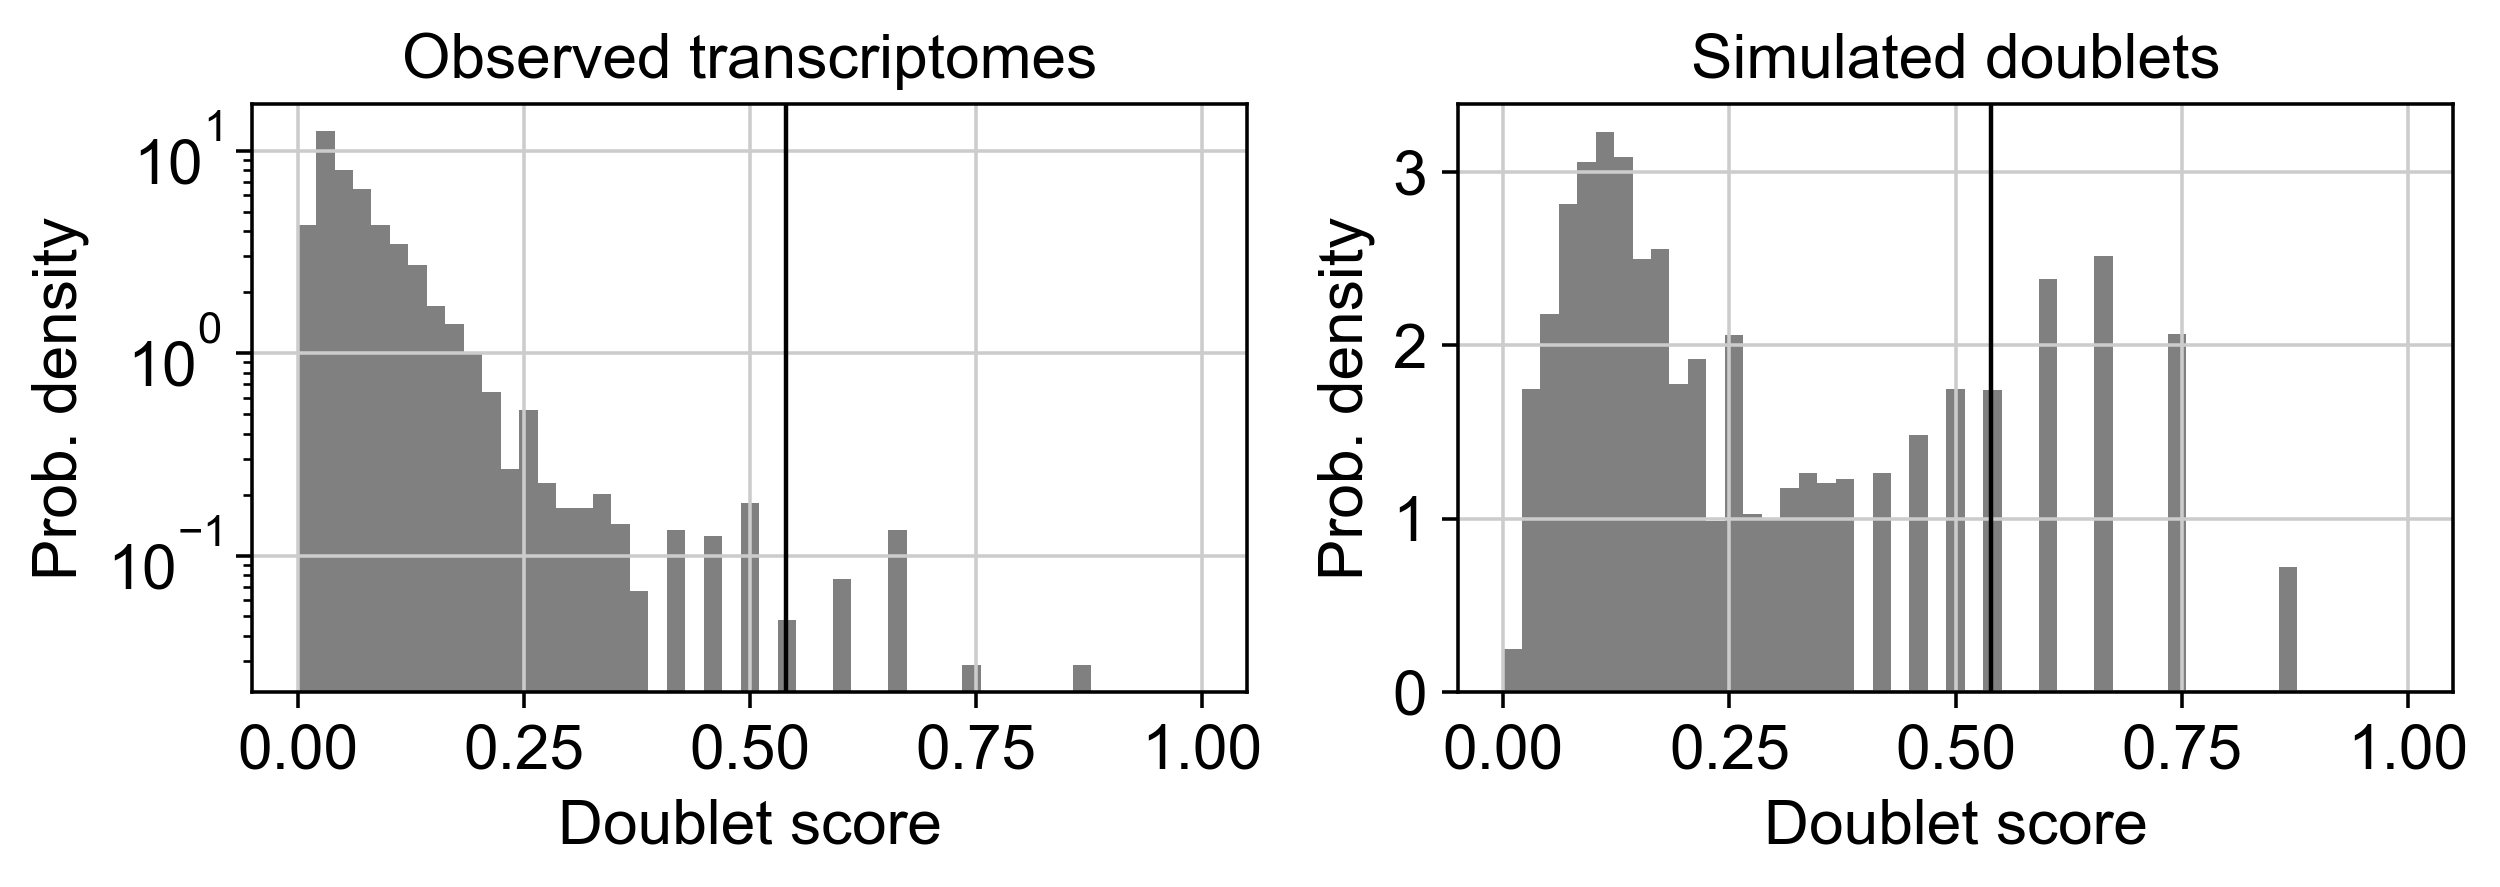

In [6]:
scrub = scr.Scrublet(adata_1.X)
adata_1.obs['doublet_scores'], adata_1.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_1.obs['predicted_doublets'])

In [7]:
adata_2 = sc.read_h5ad('../data/SCC0120_1_Sample_2/SCC0120_1_Sample_2.raw.ctl230701.h5ad')
adata_2

AnnData object with n_obs × n_vars = 3713 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'hashtag', 'unique', 'group', 'tissue', 'condition'
    var: 'gene_ids', 'feature_types'

In [8]:
sc.pp.filter_cells(adata_2, min_genes = 200)
print(adata_2.n_obs, adata_2.n_vars)

3713 36611


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 11.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.7%
Elapsed time: 3.7 seconds


3

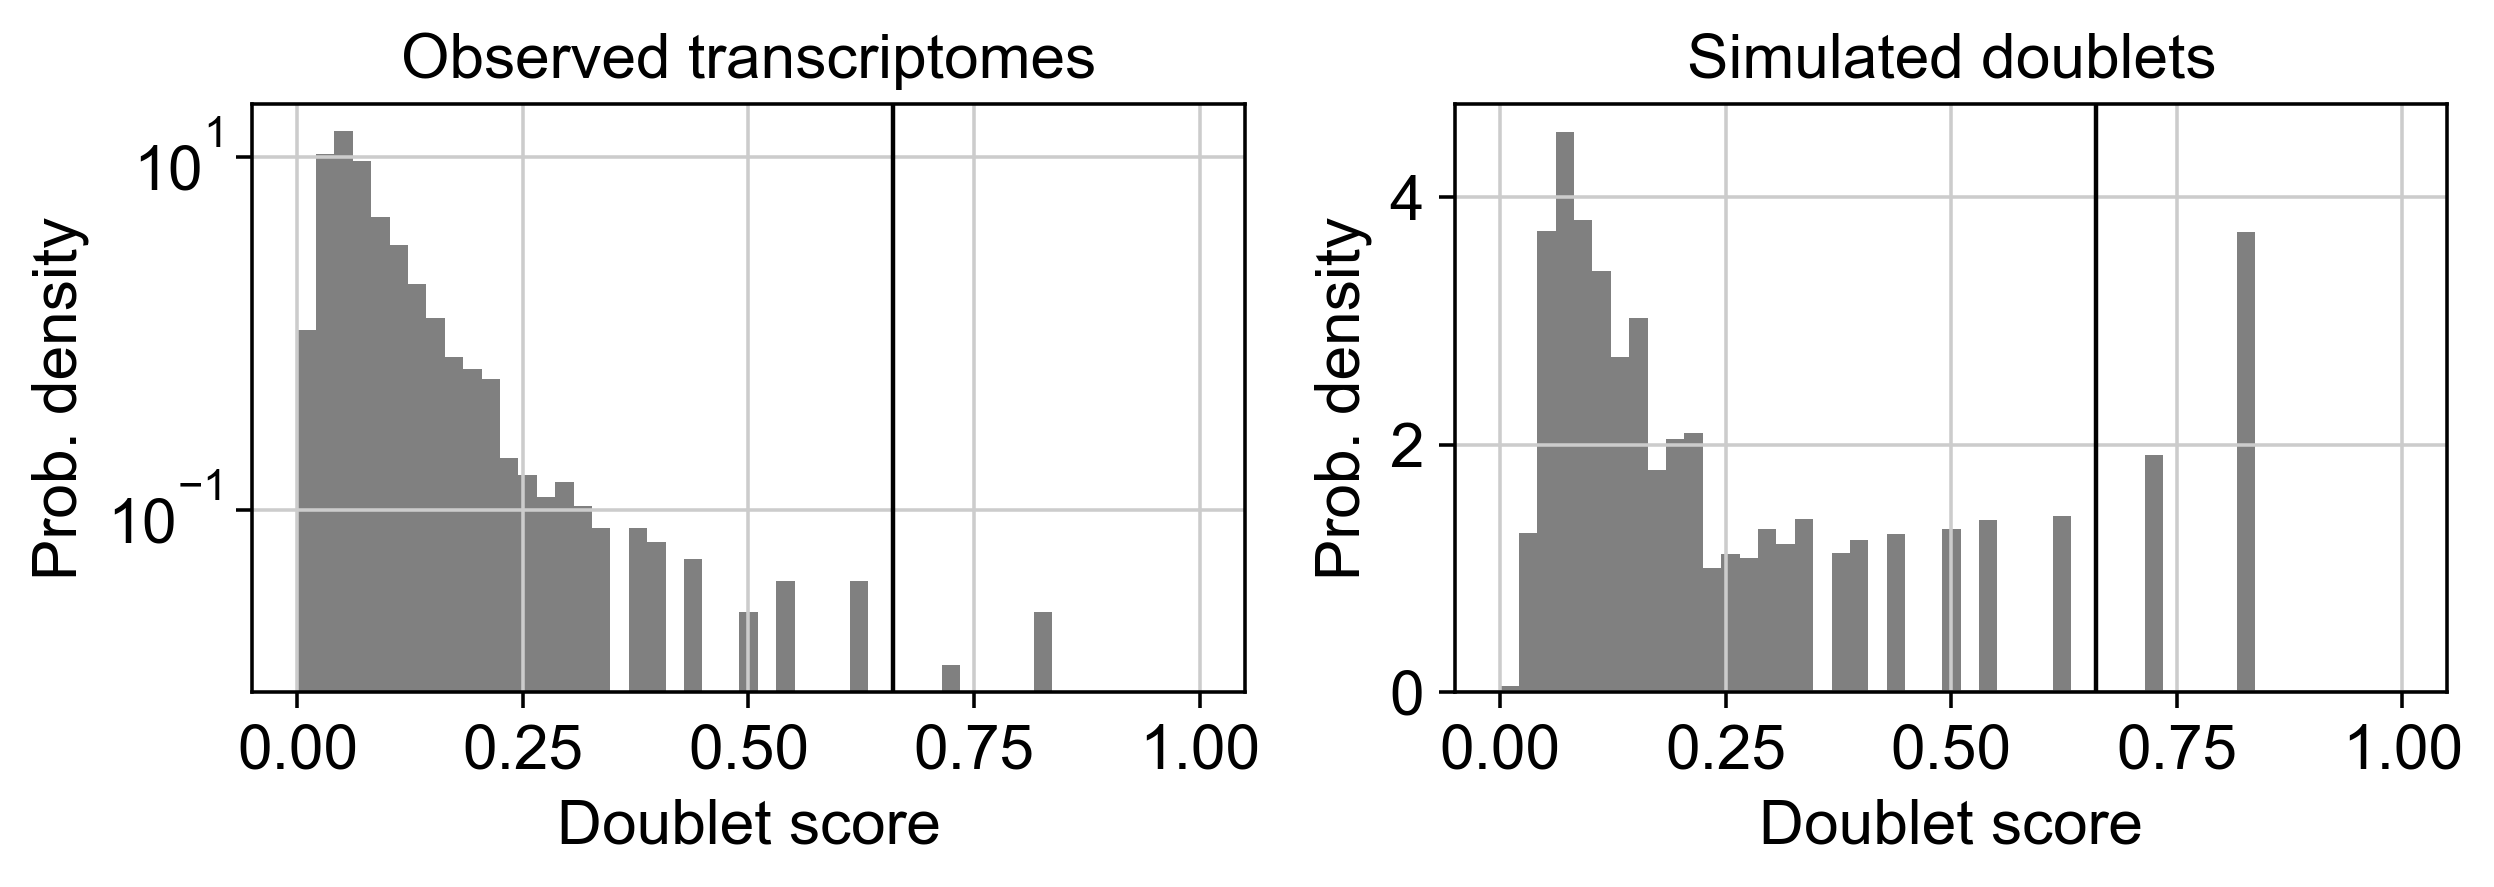

In [9]:
scrub = scr.Scrublet(adata_2.X)
adata_2.obs['doublet_scores'], adata_2.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_2.obs['predicted_doublets'])

### Merge individual objects

In [10]:
adata = adata_1.concatenate(adata_2, batch_key = 'batch', batch_categories = ['SCC0120_1_Sample_1', 'SCC0120_1_Sample_2'], join = 'inner')
adata

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 8839 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'predicted_doublets', 'hashtag', 'unique', 'group', 'batch'
    var: 'gene_ids', 'feature_types'

In [11]:
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 8839 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'predicted_doublets', 'hashtag', 'unique', 'group', 'batch'
    var: 'gene_ids', 'feature_types'

In [12]:
sample_object.shape

(8839, 36611)

### Compute QC stats

In [13]:
sample_object.shape

(8839, 36611)

In [14]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-') 
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

gene_ids     feature_types  \
MIR1302-2HG                           ENSG00000243485   Gene Expression   
FAM138A                               ENSG00000237613   Gene Expression   
OR4F5                                 ENSG00000186092   Gene Expression   
AL627309.1                            ENSG00000238009   Gene Expression   
AL627309.3                            ENSG00000239945   Gene Expression   
...                                               ...               ...   
Hashtag6_TotalA             TotalSeq_A0256_anti_human  Antibody Capture   
Hashtag7_TotalA             TotalSeq_A0257_anti_human  Antibody Capture   
Hashtag8_TotalA             TotalSeq_A0258_anti_human  Antibody Capture   
CITESeq_PE       TotalSeq_A0911_anti_phycoerythrin_PE  Antibody Capture   
CITESeq_Biotin             TotalSeq_A0436_anti_Biotin  Antibody Capture   

                    mt   ribo  
MIR1302-2HG      False  False  
FAM138A          False  False  
OR4F5            False  False  
AL627309.1       False  False  
AL627309.3       False  False  
...                ...    ...  
Hashtag6_TotalA  False  False  
Hashtag7_TotalA  False  False  
Hashtag8_TotalA  False  False  
CITESeq_PE       False  False  
CITESeq_Biotin   False  False  

[36611 rows x 4 columns]

In [15]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)

In [16]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1) / np.sum(sample_object.X, axis = 1)
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1)

In [17]:
sample_object

AnnData object with n_obs × n_vars = 8839 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'predicted_doublets', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC covariates

In [18]:
sample_object.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'Hashtag1_TotalA', 'Hashtag2_TotalA', 'Hashtag3_TotalA',
       'Hashtag4_TotalA', 'Hashtag5_TotalA', 'Hashtag6_TotalA',
       'Hashtag7_TotalA', 'Hashtag8_TotalA', 'CITESeq_PE', 'CITESeq_Biotin'],
      dtype='object', length=36611)

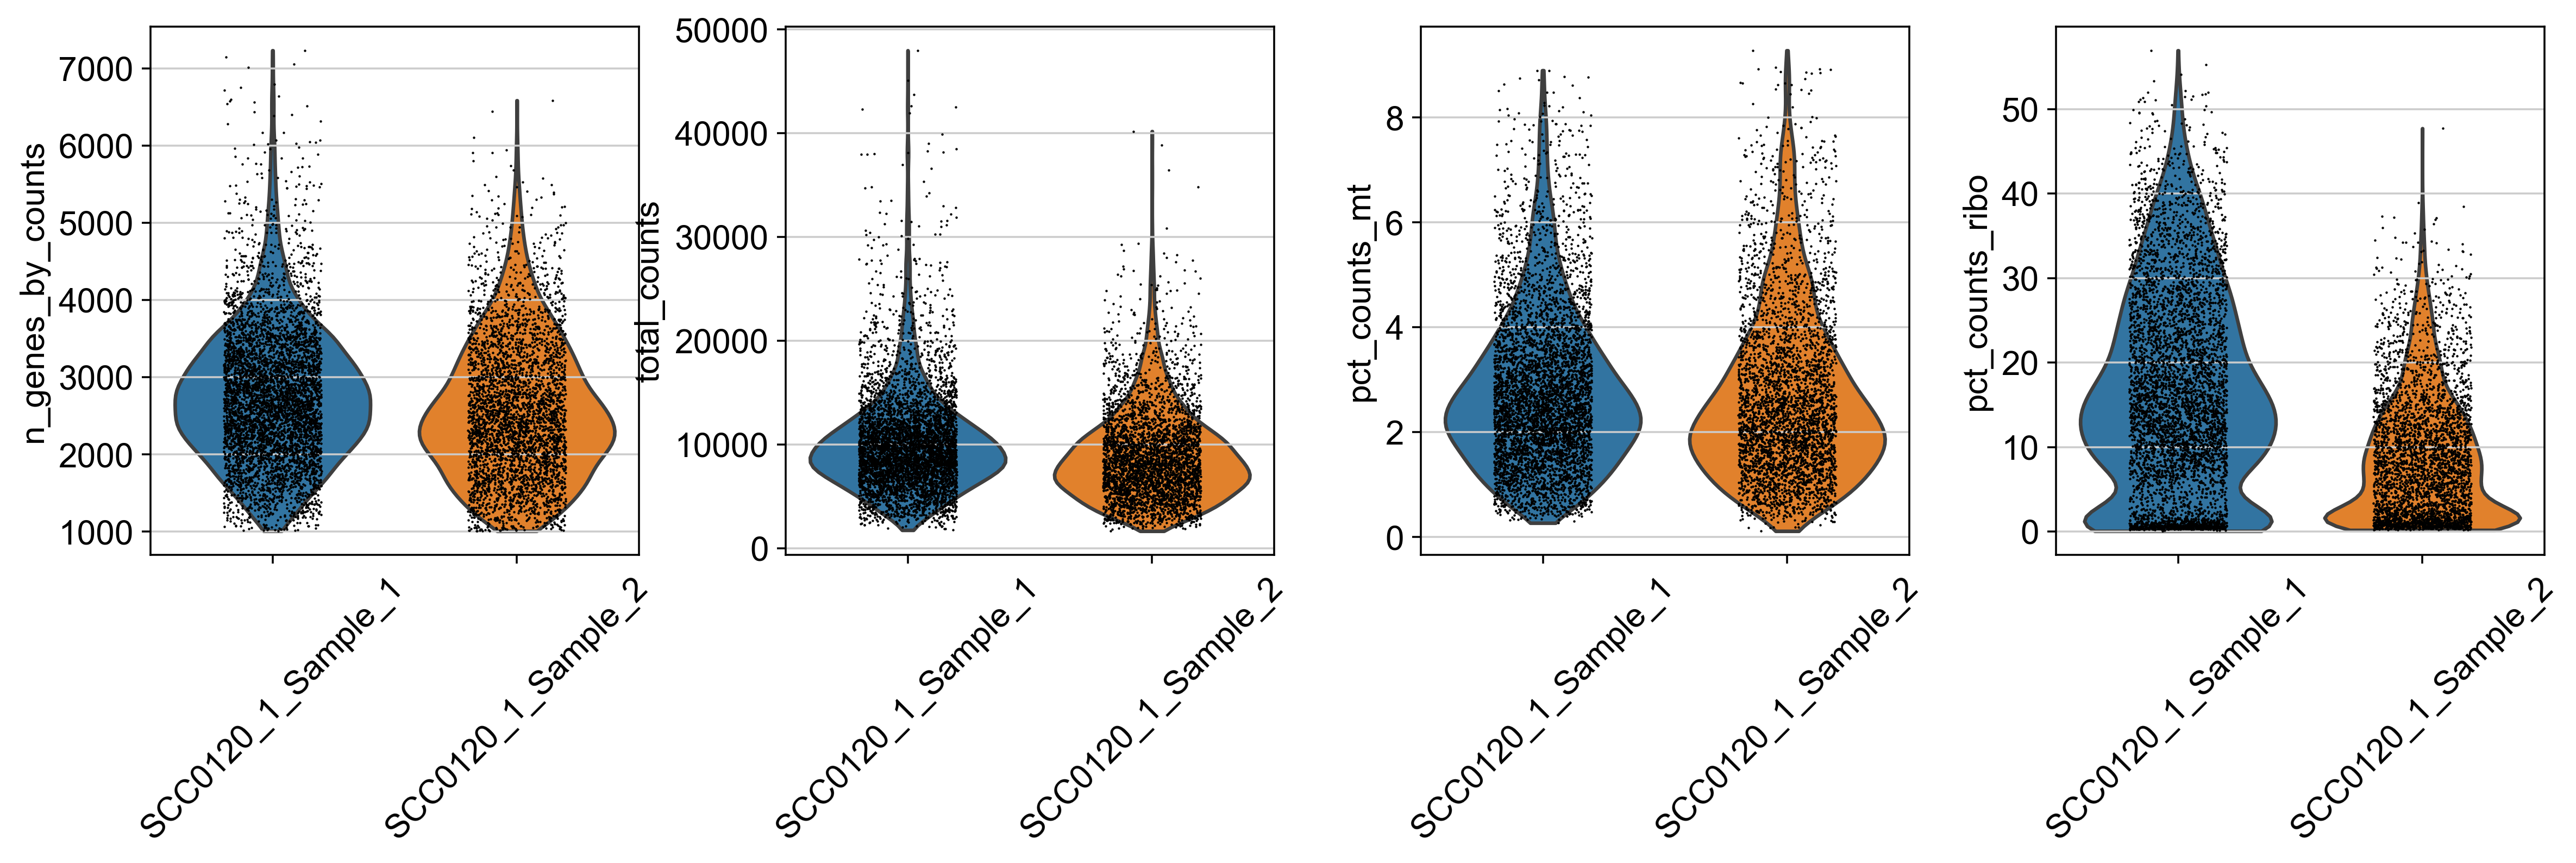

In [19]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter = 0.2, groupby = 'batch', rotation = 45)

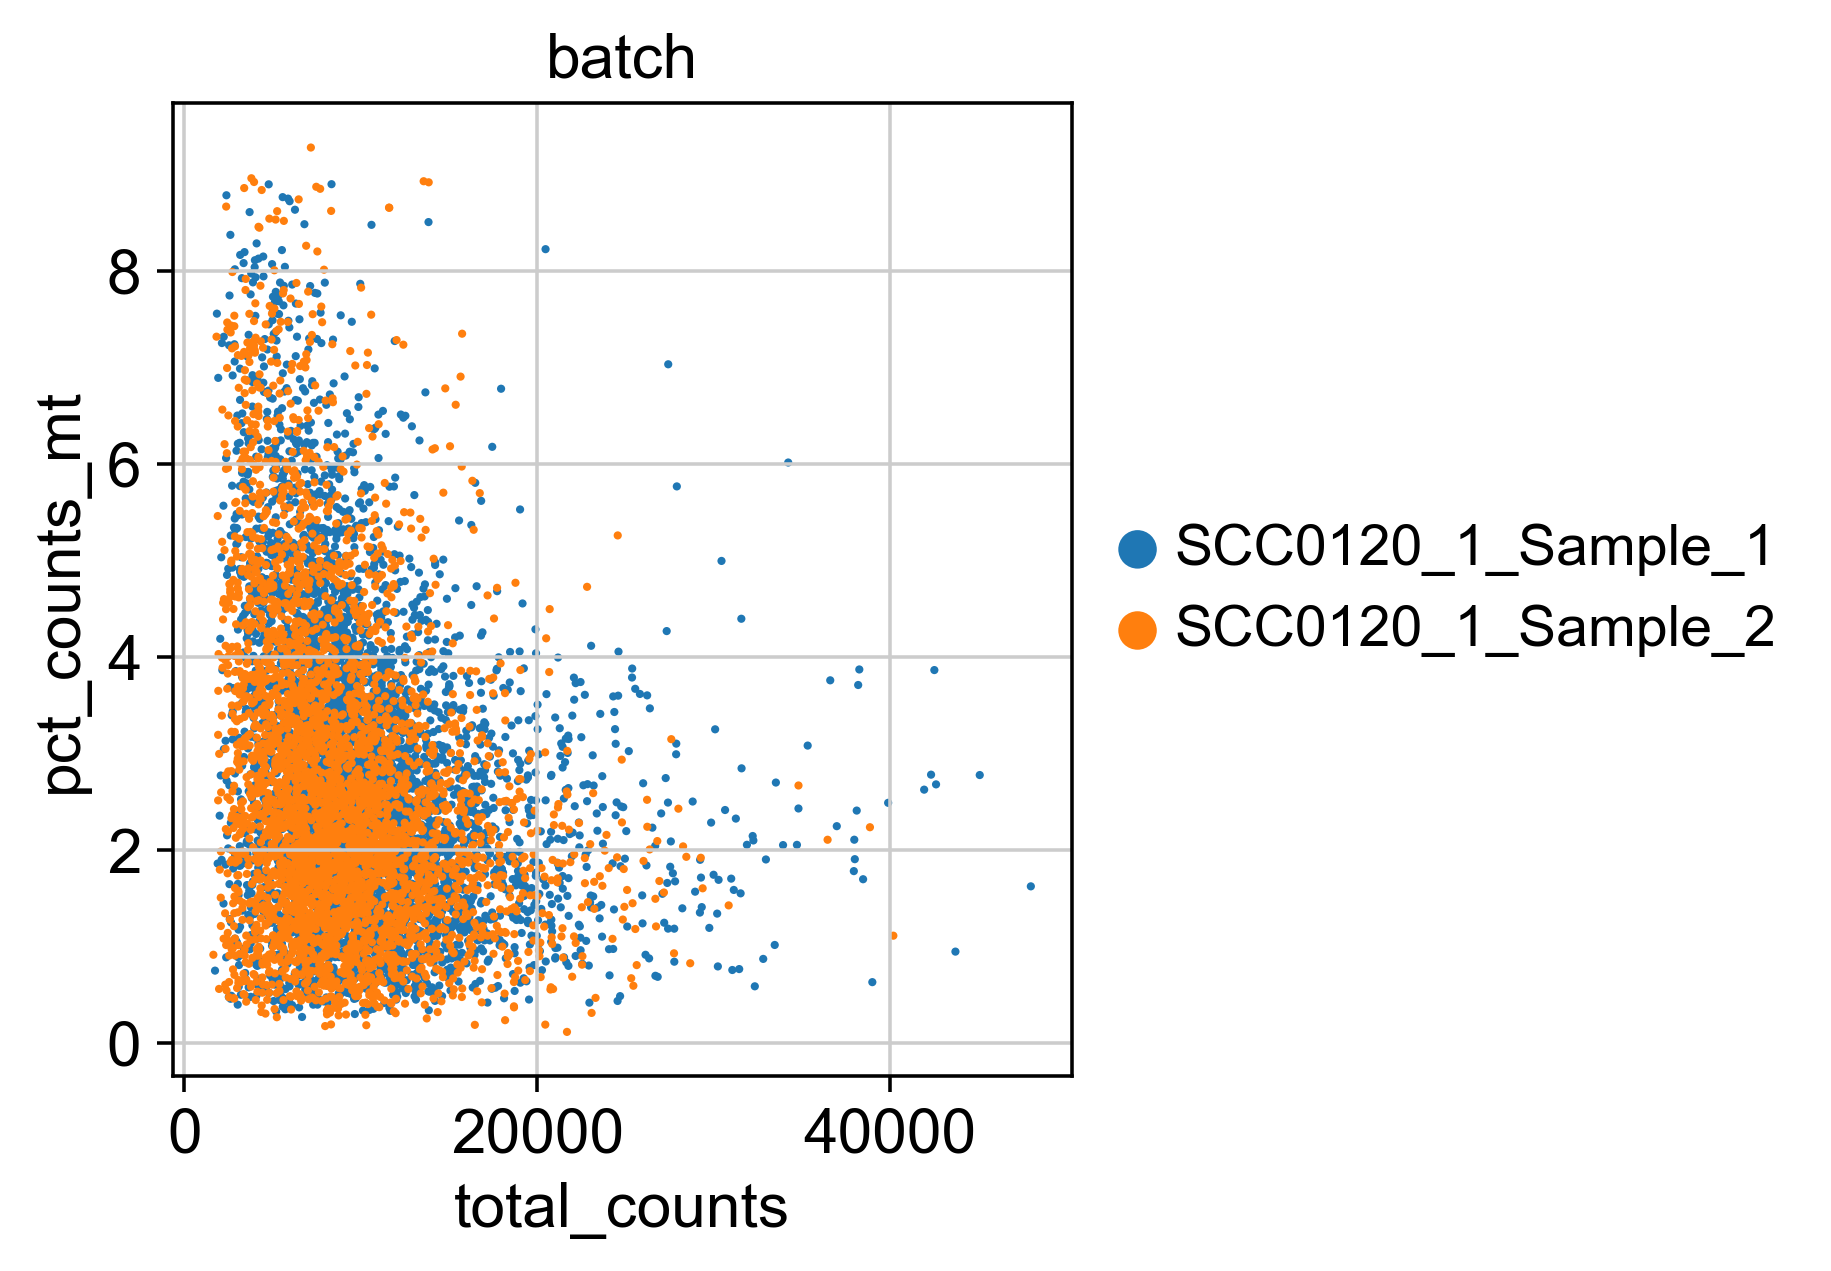

In [20]:
sc.pl.scatter(sample_object, x = 'total_counts', y = 'pct_counts_mt', color = "batch")

### Add sample sex covariate

In [21]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [22]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [23]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TGIF2LY', 'PCDH11Y',
       'TSPY2', 'LINC00280', 'TTTY1B', 'TTTY2B', 'TTTY21B', 'TTTY7', 'TTTY8B',
       'AMELY', 'TBL1Y', 'PRKY', 'TTTY12', 'TTTY18', 'TTTY19', 'TTTY20',
       'TSPY4', 'TSPY8', 'FAM197Y7', 'FAM197Y6', 'TSPY3', 'TSPY1', 'TSPY10',
       'TTTY8', 'TTTY7B', 'TTTY21', 'TTTY2', 'TTTY1', 'TTTY22', 'TTTY23',
       'USP9Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'VCY', 'VCY1B', 'NLGN4Y',
       'NLGN4Y-AS1', 'FAM41AY1', 'FAM224B', 'CDY2B', 'CDY2A', 'FAM224A',
       'FAM41AY2', 'HSFY1', 'TTTY9B', 'HSFY2', 'TTTY14', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRORY', 'RBMY1B', 'RBMY1A1', 'TTTY13', 'RBMY1D',
       'RBMY1E', 'PRY2', 'TTTY6B', 'RBMY1F', 'TTTY5', 'RBMY1J', 'TTTY6', 'PRY',
       'TTTY17A', 'TTTY4', 'BPY2', 'DAZ1', 'DAZ2', 'PRYP3', 'TTTY3B', 'CDY1B',
       'TTTY17B', 'TTTY4B', 'BPY2B', 'DAZ3', 'DAZ4', 'BPY2C', 'TTTY4C',
       'TTTY17C', 'CDY1', 'TTTY3'],
      dtype='object')

In [24]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1) / np.sum(sample_object.X, axis = 1) * 100

In [25]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')]

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "batch")

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

### Calculate cell cycle scores

In [26]:
!if [ ! -f ../data/regev_lab_cell_cycle_genes.txt ]; then curl -o ../data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   556  100   556    0     0   2322      0 --:--:-- --:--:-- --:--:--  2376


In [27]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [28]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['APOD', 'HBB', 'SCGB2A2', 'MALAT1', 'DCD', 'MUCL1', 'HBA2', 'HBA1', 'FTL', 'Hashtag1_TotalA', 'Hashtag2_TotalA', 'Hashtag3_TotalA', 'Hashtag4_TotalA', 'Hashtag5_TotalA', 'Hashtag6_TotalA', 'Hashtag7_TotalA', 'Hashtag8_TotalA', 'CITESeq_PE', 'CITESeq_Biotin']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
computing score 'G2M_score'


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    555 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


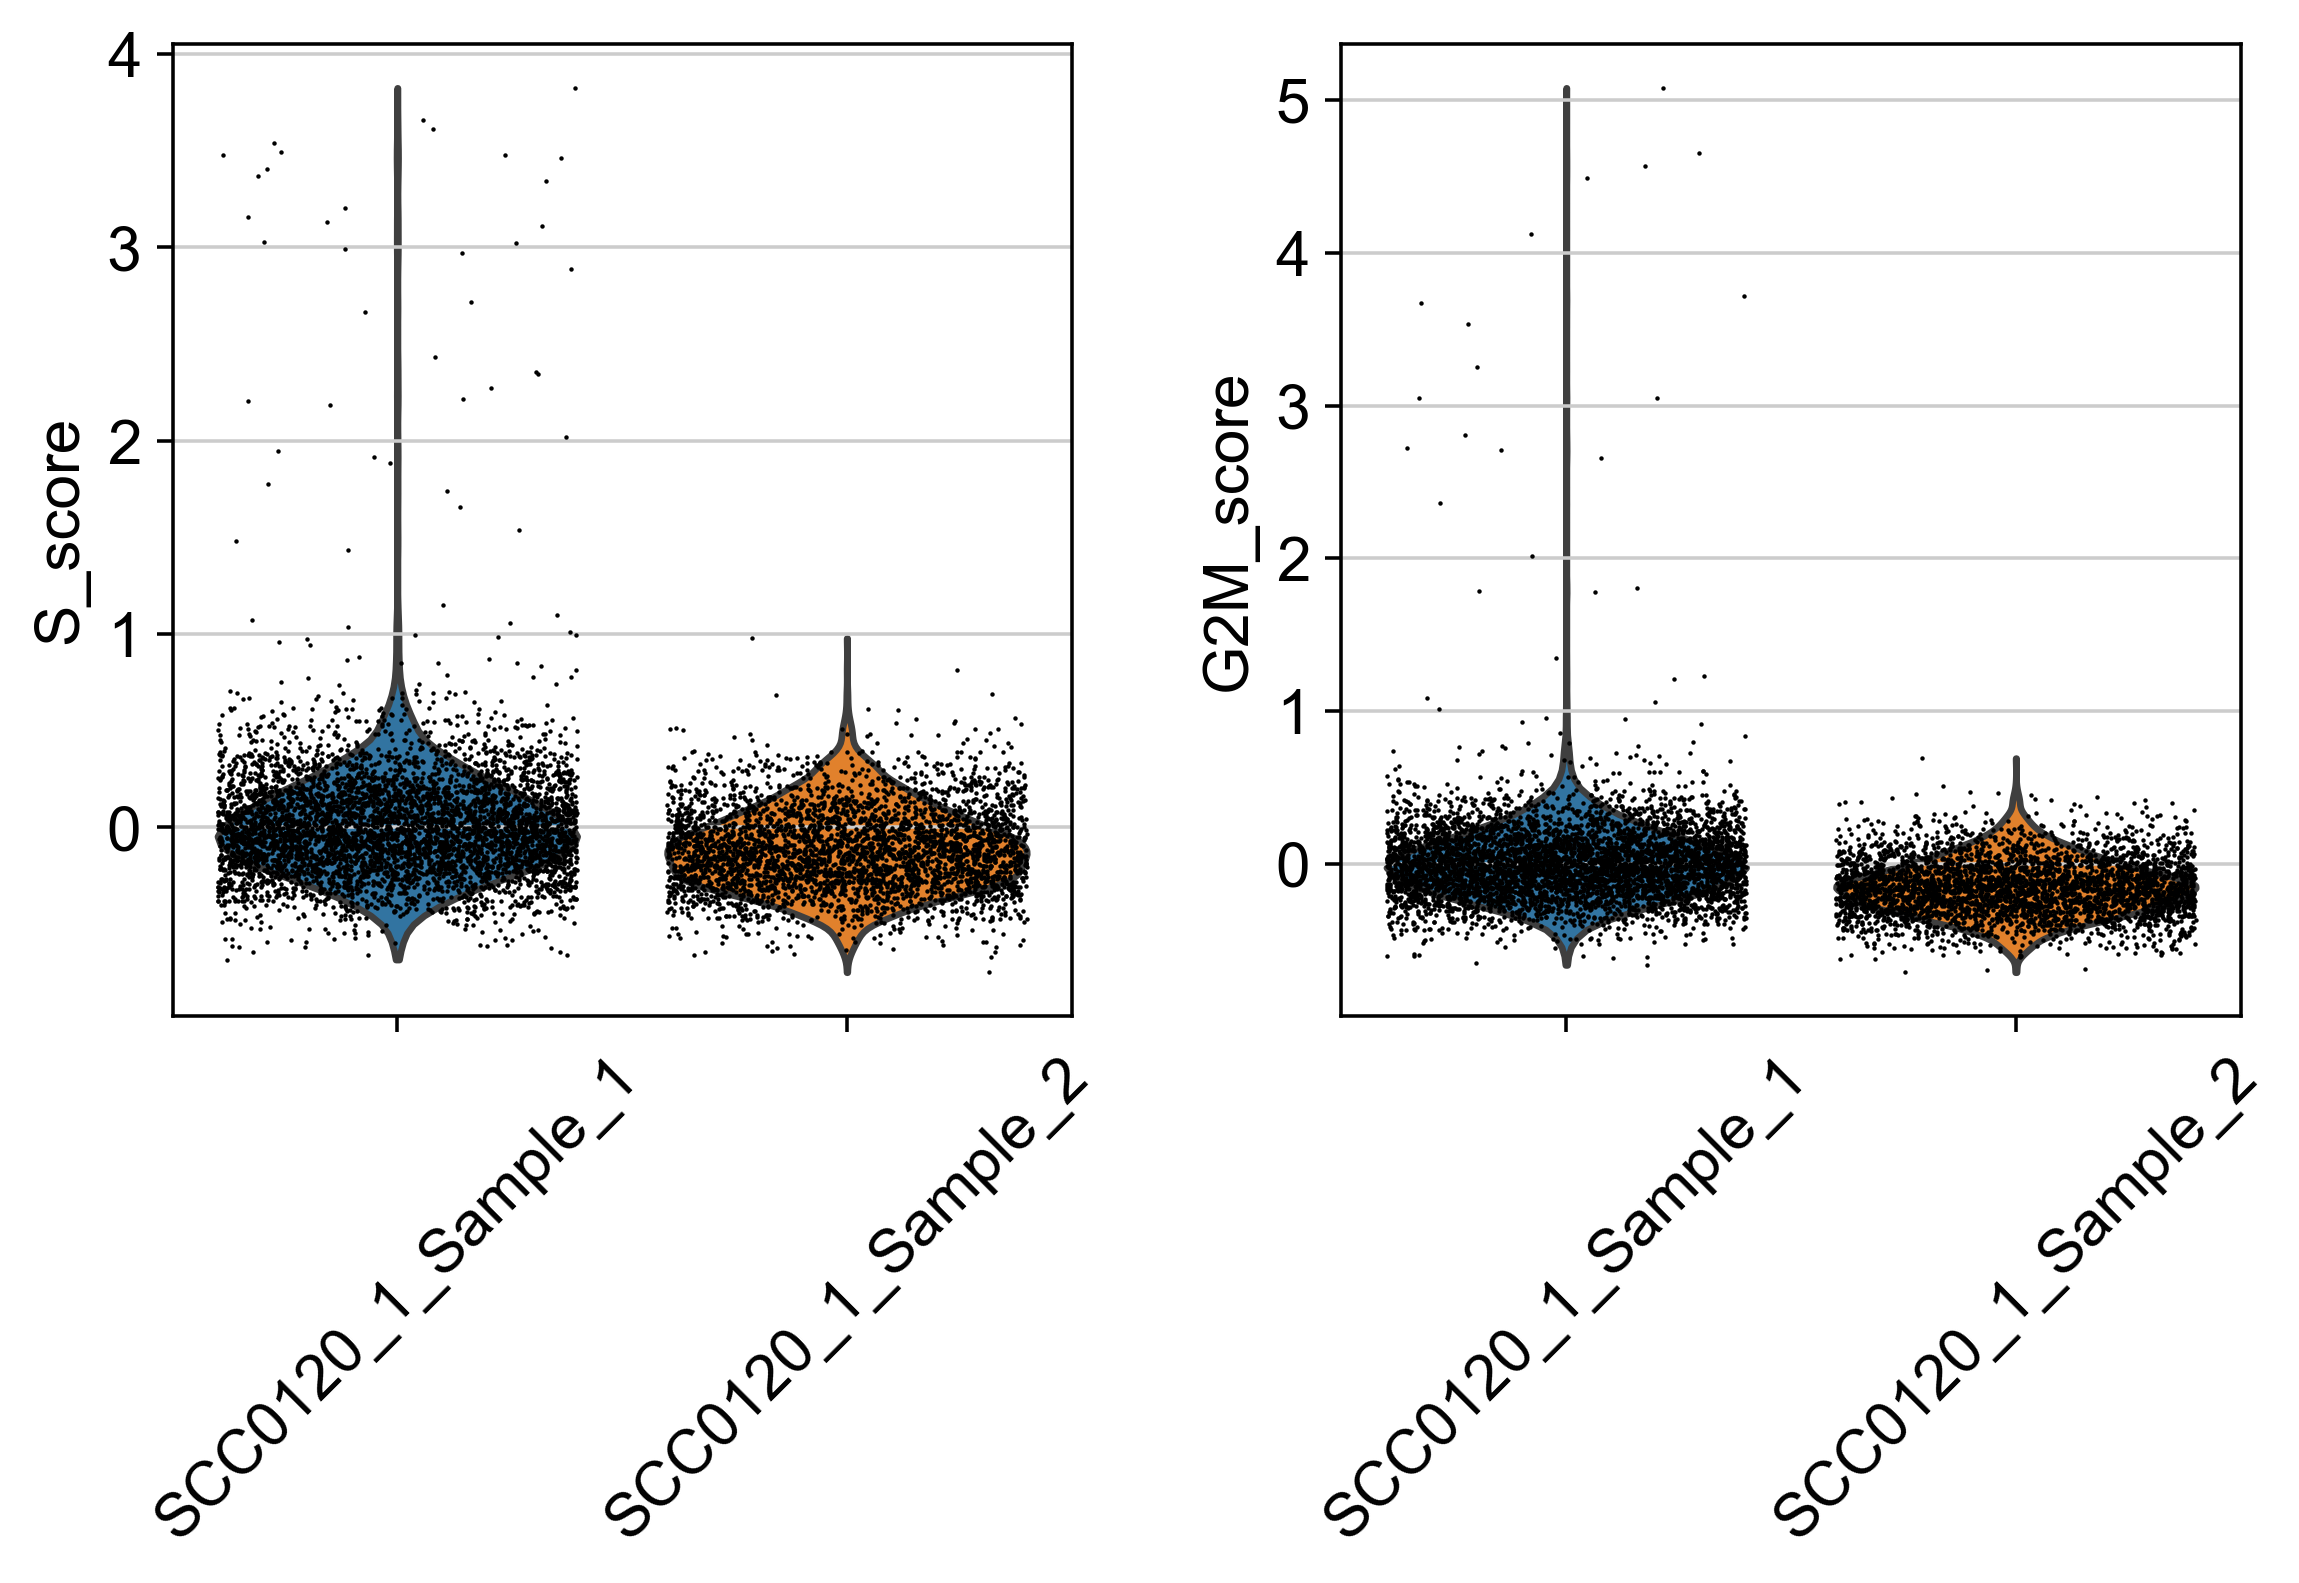

In [29]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'batch', rotation = 45)

In [30]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 8839 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'predicted_doublets', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'

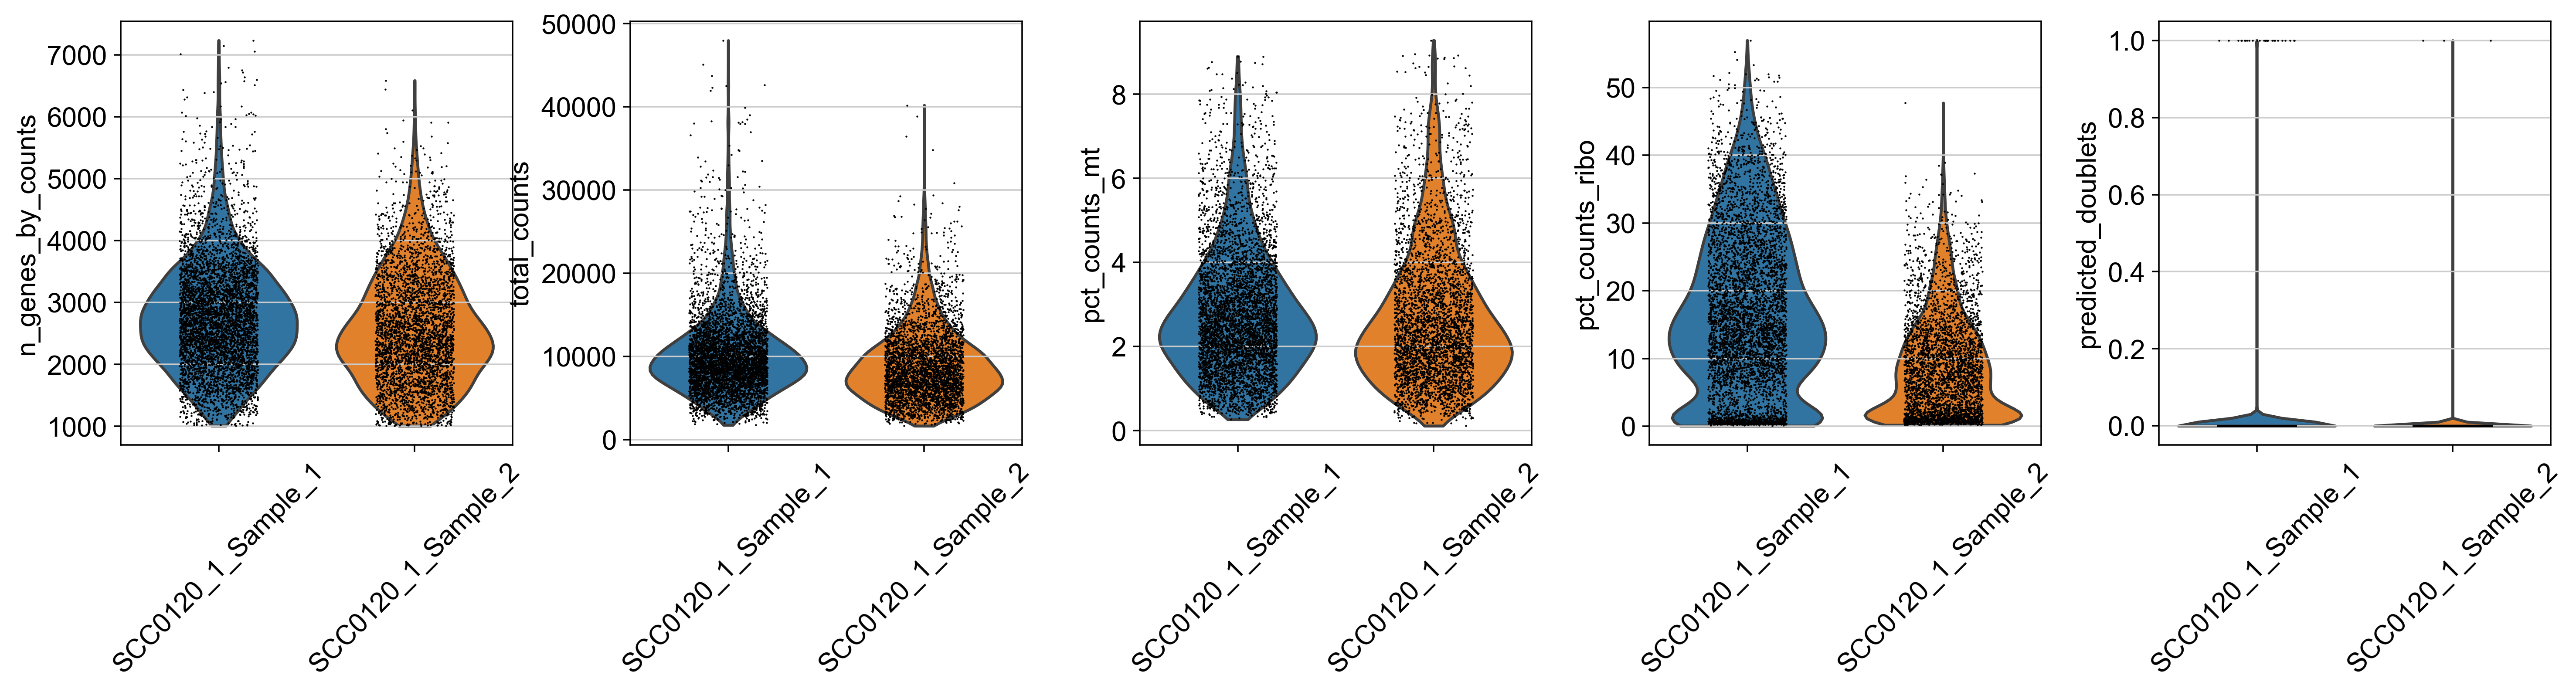

In [31]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'batch', rotation = 45)

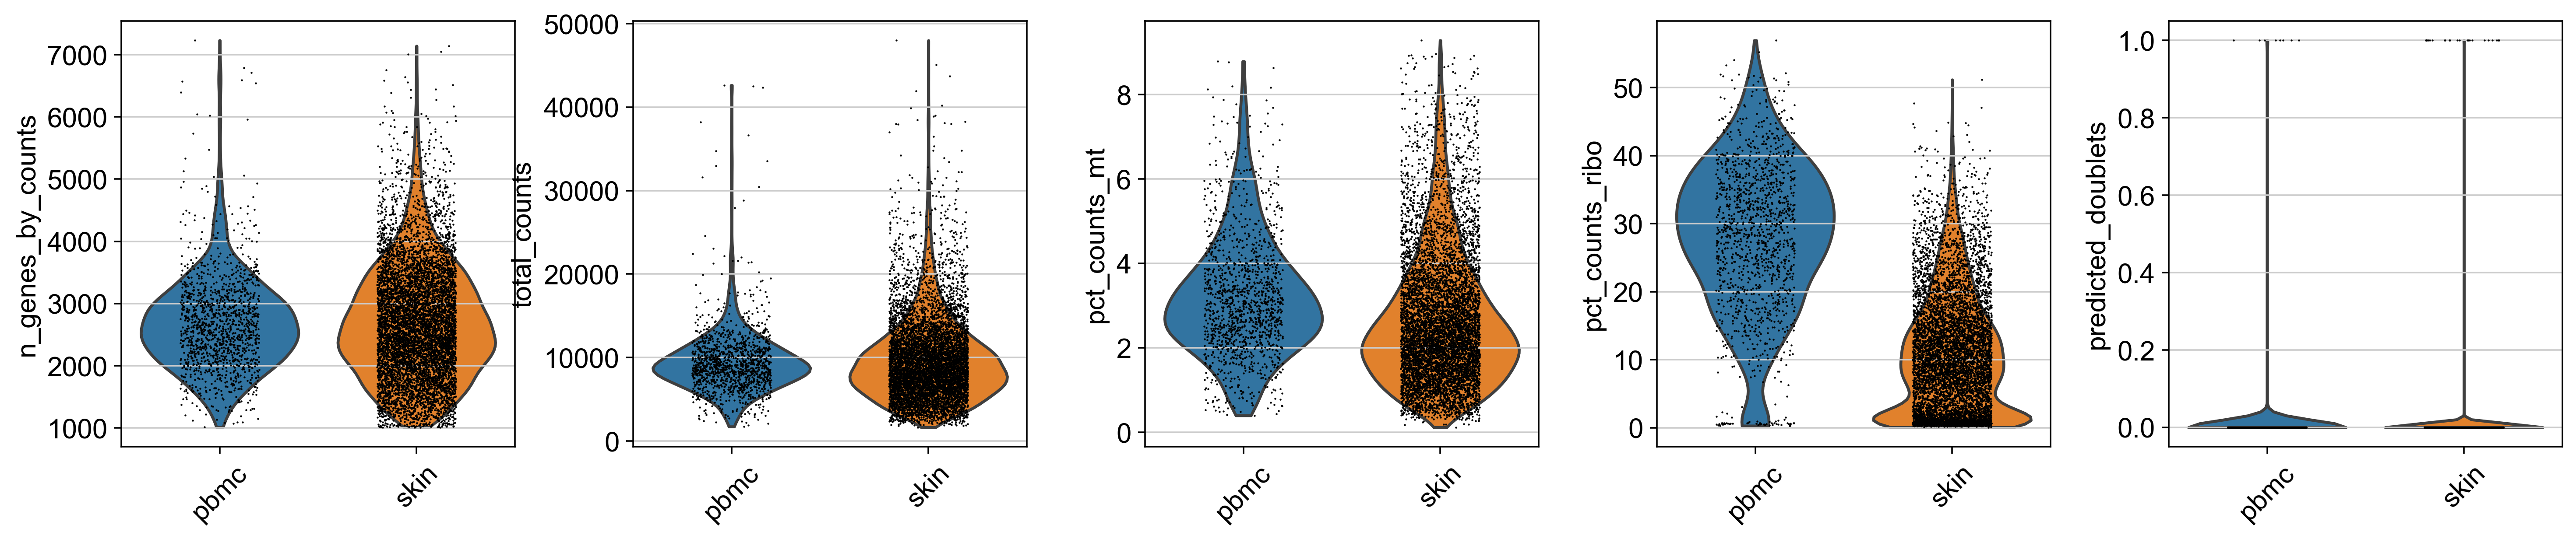

In [33]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'tissue', rotation = 45)

### Prepare counts for individual slots

In [34]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 8839 × 36611
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'predicted_doublets', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'tissue_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [35]:
sample_object.write(save_path + 'SCC0120_1_QCed_pre-processed_ctl230701.h5ad')